In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('Set2')
from collections import Counter
import csv

import nltk
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud


In [2]:
domains = [ 'bc', 'bn', 'mz', 'nw', 'tc', 'wb' ]

model_types = [ 'baseline', 'pooling', 'mult' ]


(array([79.36663333, 80.73643333, 72.76393333, 76.04086667, 69.85463333,
        52.12153333]),
 array([1.02033171, 0.67931014, 1.93756972, 0.43434365, 1.33493051,
        0.4643931 ]))

# Results

## Exper I - Domain Adaptation

,bc,bn,mz,nw,tc,wb
baseline,66.3760,80.4868,72.6998,82.3054,38.4615,46.5294
pooling,79.6315,75.7305,60.9635,60.8837,59.1065,46.7852
mult,78.3231,81.8539,72.0238,76.3610,67.5410,50.2048


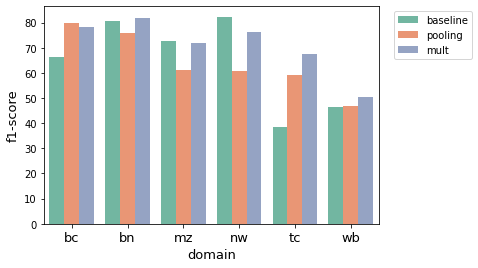

In [4]:
plot_domain_f1_score(version=0)

get_domain_f1_score(version=0)


In [5]:
get_domain_f1_score(version=1)


Error, model=>baseline, subset=>bc
Error, model=>baseline, subset=>bn
Error, model=>baseline, subset=>mz
Error, model=>baseline, subset=>nw
Error, model=>baseline, subset=>tc
Error, model=>baseline, subset=>wb


,bc,bn,mz,nw,tc,wb
baseline,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
pooling,78.4664,76.8552,60.9917,59.7088,64.6341,49.4614
mult,81.3725,78.6571,70.8364,78.5651,66.6667,53.9062


In [6]:
get_domain_f1_score(version=2)


Error, model=>baseline, subset=>bc
Error, model=>baseline, subset=>bn
Error, model=>baseline, subset=>mz
Error, model=>baseline, subset=>nw
Error, model=>baseline, subset=>tc
Error, model=>baseline, subset=>wb


,bc,bn,mz,nw,tc,wb
baseline,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
pooling,77.5426,77.9136,57.4576,60.9277,62.2517,48.5688
mult,80.5447,80.0930,74.0847,77.4371,66.6667,48.3886


In [7]:
mult_score = [
    [ 78.3231, 81.8539, 72.0238, 76.3610,67.5410, 50.2048 ],
    [ 81.3725,78.6571,70.8364,78.5651,66.6667,53.9062 ],
    [ 80.5447,80.0930,74.0847,77.4371,66.6667,48.3886 ]
]

np.mean(mult_score, axis=0), 1.960*np.std(mult_score, axis=0)/np.sqrt(3)


(array([80.0801    , 80.20133333, 72.31496667, 77.4544    , 66.95813333,
        50.8332    ]),
 array([1.45697727, 1.47938808, 1.51861617, 1.01833634, 0.46639047,
        2.59812232]))

In [8]:
pool_score = [
    [ 79.6315,75.7305,60.9635,60.8837,59.1065,46.7852],
    [ 78.4664,76.8552,60.9917,59.7088,64.6341,49.4614],
    [ 77.5426,77.9136,57.4576,60.9277,62.2517, 48.5688]
]

np.mean(pool_score, axis=0), 1.960*np.std(pool_score, axis=0)/np.sqrt(3)


(array([78.54683333, 76.8331    , 59.80426667, 60.50673333, 61.99743333,
        48.2718    ]),
 array([0.96716636, 1.00869577, 1.8777696 , 0.63880313, 2.5617131 ,
        1.25897464]))

In [14]:
mult_improve_score = [
    [78.9754, 80.9704, 70.3966, 76.4065, 69.1218, 51.9494],

    [ 80.6133,79.9127,73.5067,76.2055,71.519,51.7276 ],
    
    [ 78.5112,81.3262,74.3885,75.5106,68.9231,52.6876]
]

np.mean(mult_improve_score, axis=0), 1.960*np.std(mult_improve_score, axis=0)/np.sqrt(3)


(array([79.36663333, 80.73643333, 72.76393333, 76.04086667, 69.85463333,
        52.12153333]),
 array([1.02033171, 0.67931014, 1.93756972, 0.43434365, 1.33493051,
        0.4643931 ]))

## Exper II - Sent len

,"[1,3)","[3,6)","[6,15)","[15,25)","[25,35)","[35,60)","[60,999)",mean,std
nw,94.1176,77.4194,80.7947,77.2201,76.4391,74.4212,76.6296,79.577386,6.190291
tc,100.0000,83.3333,68.5714,70.0000,51.4286,52.6316,80.0000,72.280700,15.990912


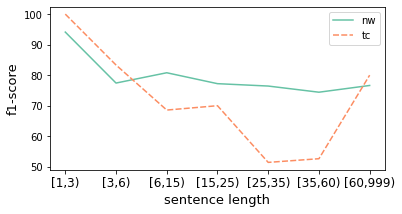

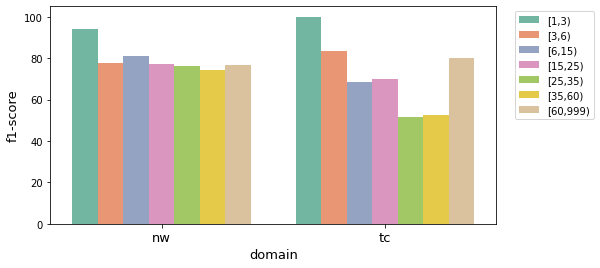

In [9]:
seq_len_range = '1,3,6,15,25,35,60,999'.split(',')

plot_seq_len_f1_score(seq_len_range, ['nw', 'tc'])
get_seq_len_f1_score(seq_len_range, [ 'nw', 'tc' ], mean=True)

# plot_seq_len_f1_score(seq_len_range, domains)
# get_seq_len_f1_score(seq_len_range, domains, mean=True)


In [13]:
from matplotlib.ticker import PercentFormatter 

def test_counts_sent_len(domain='tc'):
    sent_len = cal_sent_len(domain, ['test'])
    sent_len = np.array( sent_len.tolist() )

    count_range_ratio = []
    count_range = []
    for i,v in enumerate(seq_len_range[:-1]):
        next_v = seq_len_range[i+1]
        count_range.append( len(sent_len[ (sent_len >= int(v)) & (sent_len < int(next_v)) ]) )
        count_range_ratio.append( round( len(sent_len[ (sent_len >= int(v)) & (sent_len < int(next_v)) ]) / len(sent_len) * 100, 2) )

    print(count_range)
    print(count_range_ratio)
    
    
    xlabels = []
    for i,v in enumerate(seq_len_range[:-1]):
        next_v = seq_len_range[i+1]
        xlabels.append('[{},{})'.format(v, next_v))
        

    fig, ax = plt.subplots(1, 2, figsize=(14.5, 4.2))
    sns.barplot(x=xlabels, y=count_range_ratio, ax=ax[0])
    ax[0].set_xlabel('sentence length in ' + domain, fontsize=13)
    ax[0].set_ylabel('percentage (%)', fontsize=13)
    ax[0].xaxis.set_tick_params(labelsize=13)
    
    entity_ratio = [ v for v in cal_entity_by_sent(domain, 'sent', seq_len_range).values() ]
    print(entity_ratio)

    sns.barplot(x=xlabels, y=entity_ratio, ax=ax[1])
    ax[1].set_xlabel('sentence length in ' + domain, fontsize=13)
    ax[1].set_ylabel('percentage (%)', fontsize=13)
    ax[1].xaxis.set_tick_params(labelsize=13)

    plt.show()    


[397, 228, 467, 143, 56, 18, 1]
[30.31, 17.4, 35.65, 10.92, 4.27, 1.37, 0.08]
[0.01, 0.12, 0.88, 0.52, 0.22, 0.15, 0.03]


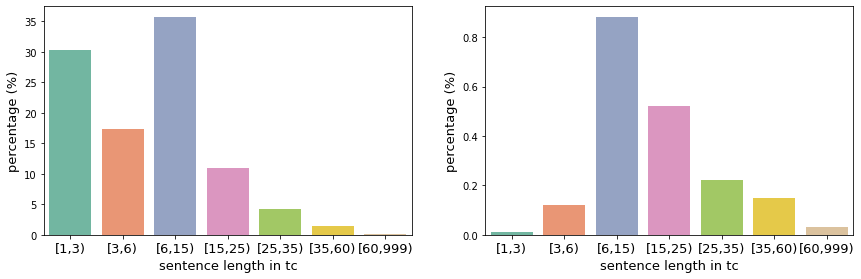

In [14]:
test_counts_sent_len('tc')


[24, 72, 393, 644, 483, 449, 96]
[1.11, 3.33, 18.19, 29.8, 22.35, 20.78, 4.44]
[0.03, 0.06, 0.7, 1.61, 2.29, 3.09, 1.05]


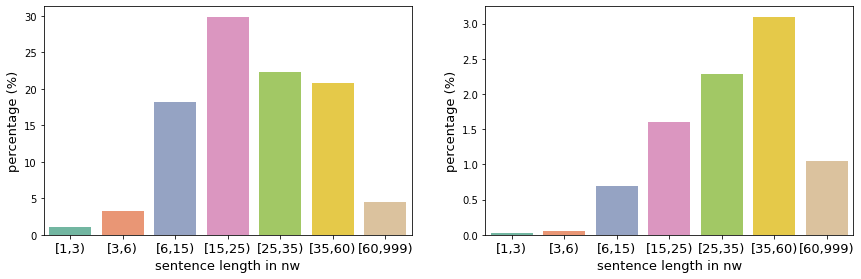

In [15]:

test_counts_sent_len('nw')


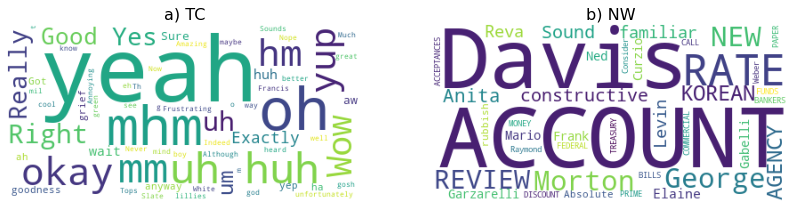

In [16]:
def plot_word_by_sent_len(domain, minv=1, maxv=3):
    tc_test_sent = load_sentences(domain, ['test'])['sentence']
    tc_test_len = cal_sent_len(domain, ['test'])
    
    valid_words = ' '.join( tc_test_sent[ 
        (tc_test_len < maxv) & (tc_test_len >= minv)
    ]).split()

    valid_words = [w for w in valid_words if w not in ['End', '-RRB-', '-LRB-'] ]
    
    return ' '.join( valid_words )



wordcloud_nw = WordCloud(
    background_color = 'white',
    random_state = 42
).generate(plot_word_by_sent_len('nw'))

wordcloud_tc = WordCloud(
    background_color = 'white',
    random_state = 42
).generate(plot_word_by_sent_len('tc'))

fig, ax = plt.subplots(1, 2, figsize=(14, 12))
ax[0].imshow(wordcloud_tc)
ax[0].axis("off")
ax[0].set_title('a) TC', fontsize=16)

ax[1].imshow(wordcloud_nw)
ax[1].axis("off")
ax[1].set_title('b) NW', fontsize=16)

plt.show()


In [18]:

one_word = set( ( ' '.join( load_feat_sentences('tc', 'sent', [1])['sentence'].tolist() ) ).split() )

print( one_word )

modal_particles = [ 'yeah', 'Nope', 'maybe', 'the-', 'oh', 'ha', 'yes', 'aw', 
                   '%eh',  'mil-', '%um', '%huh', '%ah', 'mhm', 'Wow', 'g-'
                   'yep', 'Yes', '%mm',  '%uh', 'god', 'Sure', 'Th-', 'An-', 
                   'a-', 'Exactly', 'uh-oh', 'wow', 'uh-huh', 'So',
                   't-', 'o-',  'gosh', 'okay',  '%hm', 'ha-', 'yup']



{'oh', '%um', 'Although', 'Goodness', 'Sounds', '%uh', 'then', 'unfortunately', 'Or', '.', 'Amazing', 'yes', 'a-', 'so', 'It', 'Wow', 'yup', 'An-', 'ha', 'uh-oh', 'wow', 'Really', 'Nope', 'mind', 'yep', 'you', 'that', 'yeah', 'Indeed', 'way', 'ha-', 'Anyway', "'m", 'Do', 'but', '?', 'Wait', 'lillies', 'She', 'really', 'Again', 'That', 'know', 'goodness', 'So', 'But', 'Very', '%eh', '%ah', 'gosh', 'god', 'a', 'Never', 'the-', 'good', 'aw', 'Now', 'okay', 'Much', 'heard', 'No', 'mhm', 'Th-', 'he', 'cool', 'Right', 'mil-', 'about', 'Here', 'as', 'better', 'green', 'it', 'no', 'she', 'g-', 'did', 'Sure', 'got', 'should', 'Exactly', 'well', 'What', 'Tops', 'see', '!', 'Francis', '%huh', 'He', 'uh-huh', 'and', 'Good', 'boy', 'And', 'White', ',', 'Why', 't-', '%mm', '%hm', 'the', 'Slate', 'Because', 'great', 'o-', 'anyway', 'grief', 'Yes', 'I', 'maybe', 'wait', 'Annoying', 'Frustrating', 'Got'}


In [19]:
def avg_modal_sent(domain='tc', feat='sent', val_range=[25]):
    modal_counts = []
    sents = load_feat_sentences(domain, feat, val_range)['sentence'].tolist()
    for sent in sents:
        m_c = 0
        for w in sent.split():
            if w != '.' and ( w in modal_particles or w.lower() in modal_particles ):
                m_c += 1
        modal_counts.append(m_c)
    return np.mean(modal_counts)

for d in ['nw', 'tc']:
    for v in seq_len_range[:-1]:
        print(d, v, avg_modal_sent(d, 'sent', [v]) )



nw 1 0.0
nw 3 0.013888888888888888
nw 6 0.007633587786259542
nw 15 0.004658385093167702
nw 25 0.006211180124223602
nw 35 0.008908685968819599
nw 60 0.0
tc 1 0.8161209068010076
tc 3 0.42105263157894735
tc 6 0.3554603854389722
tc 15 0.8041958041958042
tc 25 1.2321428571428572
tc 35 1.6666666666666667
tc 60 1.0


In [20]:
def modal_ratio(domain='tc', feat='sent', val_range=[25,35]):
    word_counts = 0
    modal_counts = 0
    for w in ' '.join( load_feat_sentences(domain, feat, val_range)['sentence'].tolist() ).split():
        if w != '.':
            word_counts += 1
            if w in modal_particles or w.lower() in modal_particles:
                modal_counts += 1

    return word_counts, modal_counts, modal_counts/word_counts*100

for d in ['nw', 'tc']:
    for v in seq_len_range[:-1]:
        print(d, v, modal_ratio(d, 'sent', [v]) )


nw 1 (61, 0, 0.0)
nw 3 (268, 1, 0.3731343283582089)
nw 6 (4269, 3, 0.07027406886858749)
nw 15 (12601, 3, 0.023807634314736925)
nw 25 (14095, 3, 0.021284143313231644)
nw 35 (19362, 4, 0.020659022828220228)
nw 60 (6978, 0, 0.0)
tc 1 (537, 324, 60.33519553072626)
tc 3 (959, 96, 10.010427528675704)
tc 6 (4393, 166, 3.7787389027999088)
tc 15 (2555, 115, 4.500978473581213)
tc 25 (1571, 69, 4.392106938255888)
tc 35 (731, 30, 4.1039671682626535)
tc 60 (77, 1, 1.2987012987012987)


## Exper II - Rare Word

,"[1,2)","[2,4)","[4,9)","[9,29)","[29,9999)",mean,std
nw,71.2903,77.9633,74.4698,81.0510,78.1065,76.57618,3.366522
tc,56.0000,43.2432,72.2222,76.1905,66.6667,62.86452,11.930820


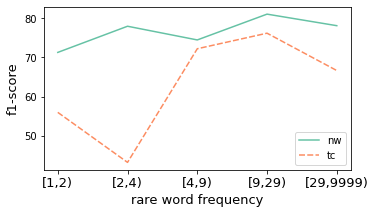

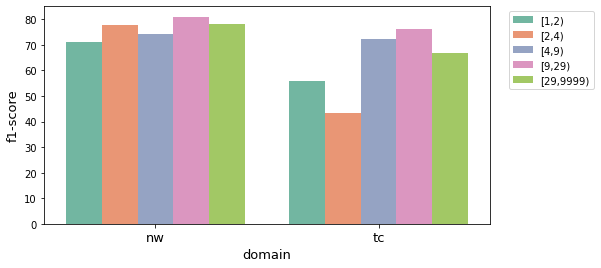

In [21]:
rare_freq_range = '1,2,4,9,29,9999'.split(',')

plot_rare_f1_score(rare_freq_range, [ 'nw', 'tc'])
get_rare_f1_score(rare_freq_range, [ 'nw', 'tc'], mean=True)

# plot_seq_len_f1_score(rare_freq_range, domains)
# get_seq_len_f1_score(rare_freq_range, domains, mean=True)


In [22]:

nw_word_counts,nw_words,nw_freq = cal_word_freq(load_sentences('nw', ['train'])['sentence'].tolist())
tc_word_counts,tc_words,tc_freq = cal_word_freq(load_sentences('tc', ['train'])['sentence'].tolist())

len(nw_word_counts), len(tc_word_counts)


(31387, 4997)

In [8]:
sent_all_domain = load_sentences('pool', ['train'])['sentence']

word_counts, words, freqs = cal_word_freq(sent_all_domain.tolist())

# total tokens including repeative words
total_repeat_tokens = []
for sent in sent_all_domain.tolist(): # each sent
    for w in sent.split(): # each word 
        if w not in string.punctuation:
            total_repeat_tokens.append(w.lower())


In [9]:
len( total_repeat_tokens ), np.sum(freqs<=2) 



(1691818, 27347)

40 0
50 1
60 2
65 3
70 4
75 6
80 9
85 15
90 20


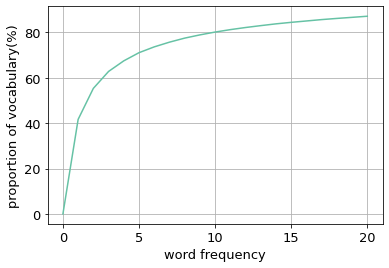

In [10]:

plot_rare_freq(freqs, max_freq=20)


In [53]:
rare_words_json = dict()
for i, v in enumerate(rare_freq_range[:-1]):
    next_v = rare_freq_range[ i + 1 ]
    cur_word = words[ (freqs < int(next_v)) & (freqs >= int(v)) ].tolist()

    print('word [{}, {}) -> {}'.format(v, next_v, len(cur_word)))
    rare_words_json[ '[{}, {})'.format(v, next_v) ] = {
      'length': len(cur_word),
      'words': cur_word
    }


word [1, 2) -> 20593
word [2, 4) -> 10441
word [4, 9) -> 7258
word [9, 29) -> 6024
word [29, 9999) -> 5080


In [32]:
cal_entity_by_sent('nw', 'rare', rare_freq_range)


{'1': 2.08, '2': 1.88, '4': 2.11, '9': 1.92, '29': 0.84}

In [33]:
cal_entity_by_sent('tc', 'rare', rare_freq_range)


{'1': 0.14, '2': 0.32, '4': 0.42, '9': 0.66, '29': 0.38}

In [34]:
print( len(load_error_word_by_feat('tc', 'rare', [1])) )

print( load_error_word_by_feat('tc', 'rare', [1])) 

[ (w, word_counts[w]) for w in set( load_error_word_by_feat('tc', 'rare', [1]) ) if w != '_UNK' ]


10
['tufts', 'meryl', 'lynch', 'bode', 'jasmine', 'jasmine', 'jasmine', 'jetta', 'jetta', 'jasmine']


[('jetta', 1),
 ('bode', 2),
 ('meryl', 1),
 ('tufts', 3),
 ('lynch', 100),
 ('jasmine', 6)]

In [35]:
print( len(load_error_word_by_feat('tc', 'rare', [2])) )

print( load_error_word_by_feat('tc', 'rare', [2])) 

print('_UNK', len([ w for w in  load_error_word_by_feat('tc', 'rare', [2]) if w == '_UNK' ]))

[ (w, word_counts[w]) for w in set( load_error_word_by_feat('tc', 'rare', [2]) ) if w != '_UNK' ]


28
['tufts', '_UNK', 'hard', 'core', 'brace', 'tufts', '_UNK', '_UNK', '_UNK', 'hard', 'core', 'brace', 'lorraine', 'den', 'haag', 'leo', 'optics', 'letters', '_UNK', 'rev', 'letters', 'goode', 'westchester', 'amway', 'tufts', '_UNK', 'island', 'francis']
_UNK 6


[('haag', 3),
 ('island', 149),
 ('francis', 12),
 ('letters', 73),
 ('rev', 2),
 ('tufts', 3),
 ('lorraine', 2),
 ('brace', 3),
 ('amway', 3),
 ('optics', 3),
 ('leo', 5),
 ('westchester', 2),
 ('den', 3),
 ('core', 71),
 ('goode', 2),
 ('hard', 526)]

## Exper III - POS

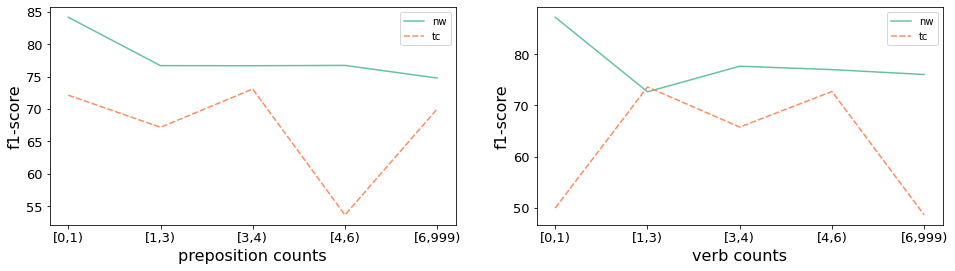

In [64]:
def plot_prep_verb_f1_score(domains, prep_range,verb_range, model='mult', version=0):
    prep_f1_score = get_prep_f1_score(prep_range, domains, model=model, version=version)
    verb_f1_score = get_verb_f1_score(verb_range, domains, model=model, version=version)

    prep_f1_score_verted = prep_f1_score.reset_index()
    prep_f1_score_verted = pd.melt(prep_f1_score_verted, id_vars=['index'])
    prep_f1_score_verted.columns = ['domain', 'prep_count', 'f1-score']
    
    verb_f1_score_verted = verb_f1_score.reset_index()
    verb_f1_score_verted = pd.melt(verb_f1_score_verted, id_vars=['index'])
    verb_f1_score_verted.columns = ['domain', 'verb_count', 'f1-score']
    
    fig, ax = plt.subplots(1, 2, figsize=(16, 4))
    sns.lineplot(data=prep_f1_score.T, ax=ax[0])
    ax[0].set_xlabel('preposition counts', fontsize=16)
    ax[0].xaxis.set_tick_params(labelsize=13)
    ax[0].yaxis.set_tick_params(labelsize=13)
    ax[0].set_ylabel('f1-score', fontsize=16)
    
    sns.lineplot(data=verb_f1_score.T, ax=ax[1])
    ax[1].set_xlabel('verb counts', fontsize=16)
    ax[1].xaxis.set_tick_params(labelsize=13)
    ax[1].yaxis.set_tick_params(labelsize=13)
    ax[1].set_ylabel('f1-score', fontsize=16)
    

prep_range = '0,1,3,4,6,999'.split(',')
verb_range = '0,1,3,4,6,999'.split(',')
plot_prep_verb_f1_score([ 'nw', 'tc'], prep_range, verb_range)


In [55]:
cal_entity_by_sent('tc', 'pos_verb', prep_range)


{'0': 0.09, '1': 0.81, '3': 0.43, '4': 0.31, '6': 0.29}

In [56]:
cal_entity_by_sent('tc', 'pos_prep', prep_range)


{'0': 0.35, '1': 0.85, '3': 0.36, '4': 0.25, '6': 0.14}

In [57]:
c=0
print( len(load_error_word_by_feat('tc', 'pos_verb', [c])) )
print( load_error_word_by_feat('tc', 'pos_verb', [c])) 
print('_UNK', len([ w for w in  load_error_word_by_feat('tc', 'pos_verb', [c]) if w == '_UNK' ]))
[ (w, word_counts[w]) for w in set( load_error_word_by_feat('tc', 'pos_verb', [c]) ) if w != '_UNK' ]


8
['i', 'r', 's', 'walnut', 'crest', 'walnut', 'creek', 'bode']
_UNK 0


[('bode', 2),
 ('crest', 8),
 ('creek', 10),
 ('r', 24),
 ('walnut', 5),
 ('s', 60),
 ('i', 13676)]

In [59]:
c=4
print( len(load_error_word_by_feat('tc', 'pos_prep', [c])) )
print( load_error_word_by_feat('tc', 'pos_prep', [c])) 
print('_UNK', len([ w for w in  load_error_word_by_feat('tc', 'pos_prep', [c]) if w == '_UNK' ]))
[ (w, word_counts[w]) for w in set( load_error_word_by_feat('tc', 'pos_prep', [c]) ) if w != '_UNK' ]


17
['_UNK', 'jasmine', 'jasmine', 'jasmine', 'jetta', 'penn', 'r', 'i', 'francis', '_UNK', 'tufts', 'tufts', '_UNK', '_UNK', 'jetta', 'jasmine', 'bally']
_UNK 4


[('jetta', 1),
 ('penn', 12),
 ('r', 24),
 ('tufts', 3),
 ('jasmine', 6),
 ('francis', 12),
 ('i', 13676),
 ('bally', 12)]

In [68]:
c=3
print( len(load_error_word_by_feat('tc', 'pos_prep', [c])) )
print( load_error_word_by_feat('tc', 'pos_prep', [c])) 
print('_UNK', len([ w for w in  load_error_word_by_feat('tc', 'pos_prep', [c]) if w == '_UNK' ]))
[ (w, word_counts[w]) for w in set( load_error_word_by_feat('tc', 'pos_prep', [c]) ) if w != '_UNK' ]


17
['westchester', 'den', 'haag', '_UNK', 'shape', 'headquarters', 'amsterdam', 'island', 'u', 's', 'g', 'island', 'francis', 'the', 'dutch', 'government', '_UNK']
_UNK 2


[('government', 1847),
 ('island', 149),
 ('u', 26),
 ('francis', 12),
 ('shape', 80),
 ('amsterdam', 7),
 ('headquarters', 128),
 ('dutch', 36),
 ('s', 60),
 ('the', 100611),
 ('westchester', 2),
 ('den', 3),
 ('g', 23),
 ('haag', 3)]

In [459]:
print( len(load_error_word_by_feat('tc', 'pos_verb', [0])) )

print( load_error_word_by_feat('tc', 'pos_verb', [0])) 

print('_UNK', len([ w for w in  load_error_word_by_feat('tc', 'pos_verb', [0]) if w == '_UNK' ]))

[ (w, word_counts[w]) for w in set( load_error_word_by_feat('tc', 'pos_verb', [0]) ) if w != '_UNK' ]


8
['i', 'r', 's', 'walnut', 'crest', 'walnut', 'creek', 'bode']
_UNK 0


[('s', 60),
 ('r', 24),
 ('i', 13676),
 ('walnut', 5),
 ('bode', 2),
 ('crest', 8),
 ('creek', 10)]

In [460]:
print( len(load_error_word_by_feat('tc', 'pos_prep', [0])) )

print( load_error_word_by_feat('tc', 'pos_prep', [0])) 

print('_UNK', len([ w for w in  load_error_word_by_feat('tc', 'pos_prep', [0]) if w == '_UNK' ]))

[ (w, word_counts[w]) for w in set( load_error_word_by_feat('tc', 'pos_prep', [0]) ) if w != '_UNK' ]


18
['san', 'diego', 'leo', '_UNK', 'hard', 'core', 'brace', 'the', 'american', 'government', 'goode', 'jasmine', 'leo', '_UNK', '_UNK', '_UNK', '_UNK', '_UNK']
_UNK 6


[('american', 947),
 ('jasmine', 6),
 ('the', 100611),
 ('brace', 3),
 ('diego', 28),
 ('goode', 2),
 ('leo', 5),
 ('san', 354),
 ('government', 1847),
 ('core', 71),
 ('hard', 526)]

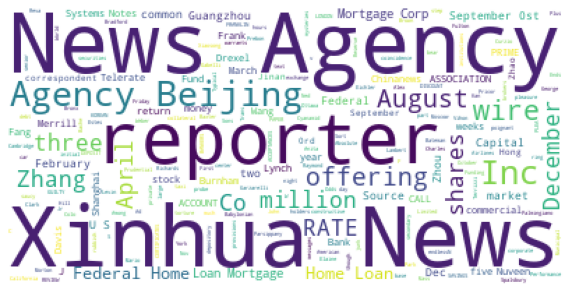

In [438]:
def plot_word_by_feat(domain='nw', feat='pos_prep', val_range=[0]):
    tc_test_sent = load_feat_sentences(domain, feat, val_range)['sentence']
    valid_words = (' '.join(tc_test_sent.tolist())).split()

    block_list = ['End', '-RRB-', '-LRB-', 'months', 'charge','January', '00st', 'via', 'six', 'days', '00th', '0th', 'month', 'said', "'s", 'one', 'rate', 'will', "n't"]
    valid_words = [w for w in valid_words if (w not in block_list) ]
    
    plot_word_cloud(' '.join( valid_words ), size=(10,10))

plot_word_by_feat('nw', 'pos_verb', [0])


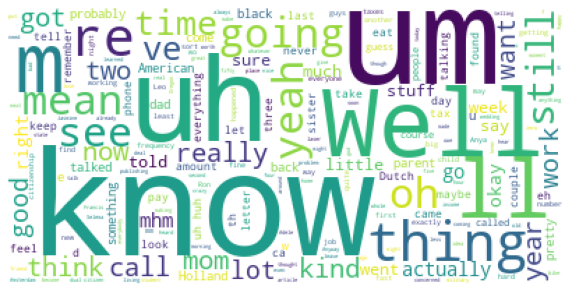

In [456]:
plot_word_by_feat('tc', 'pos_verb', [1,3,4])

#  Domain Analysis - Sent Len

In [20]:
# in_domain_split_type = ['train', 'valid', 'test']
in_domain_split_type = ['train']

sents_per_domain = []
sent_len_per_domain = []

for d in domains:
    sents = load_sentences(d, in_domain_split_type)
    sents_per_domain.append( sents )

    sent_len = []
    for sent in sents['sentence']:
        sent_words = sent.split()    
        if sent_words[-1] in string.punctuation:
            sent_len.append( len(sent_words) - 1 )
        else:
            sent_len.append( len(sent_words) )
    
    sent_len_per_domain.append(sent_len)

median_sent_len_per_domain = [ np.median( s ) for s in sent_len_per_domain ]
min_sent_len_per_domain = [ np.min( s ) for s in sent_len_per_domain ]
max_sent_len_per_domain = [ np.max( s ) for s in sent_len_per_domain ]


In [22]:
domains[-3], pd.Series(sent_len_per_domain[-3]).describe(),


('nw',
 count    32522.000000
 mean        25.647469
 std         15.139863
 min          1.000000
 25%         15.000000
 50%         23.000000
 75%         33.000000
 max        209.000000
 dtype: float64)

In [19]:
# fig, ax = plt.subplots(3, 3, figsize=(15, 12))

# for i, d in enumerate(domains):
#     ax[i//3,i%3].boxplot(x=sent_len_per_domain[i], vert=False)
#     ax[i//3,i%3].set_title(d, fontsize=14)


# ax[2, 0].bar(x=domains, height=median_sent_len_per_domain)
# ax[2, 0].set_title('median sent_len', fontsize=14)
# # ax[2,0].set_xlabel('domain', fontsize=14)
# # ax[2,0].set_ylabel('avg sent_len', fontsize=14)
# ax[2, 0].xaxis.set_tick_params(labelsize=14)

# ax[2,1].bar(x=domains, height=max_sent_len_per_domain)
# ax[2,1].set_title('max sent_len', fontsize=14)
# # ax[2,1].set_xlabel('domain', fontsize=14)
# # ax[2,1].set_ylabel('max sent_len', fontsize=14)
# ax[2,1].xaxis.set_tick_params(labelsize=14)


# ax[2,2].bar(x=domains, height=min_sent_len_per_domain)
# ax[2,2].set_title('min sent_len', fontsize=14)
# # ax[2,2].set_xlabel('domain', fontsize=14)
# # ax[2,2].set_ylabel('min sent_len', fontsize=14)
# ax[2,2].xaxis.set_tick_params(labelsize=14)


# plt.show()

## Total Corpus

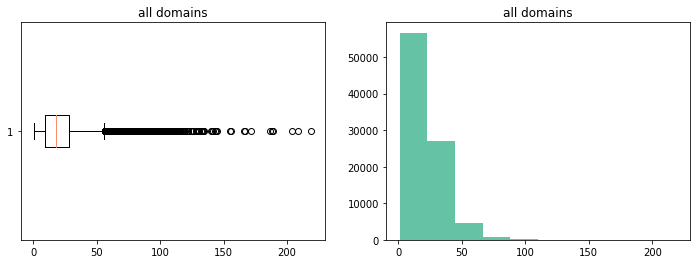

count    89389.000000
mean        20.284286
std         14.876339
min          1.000000
25%          9.000000
50%         18.000000
75%         28.000000
max        219.000000
dtype: float64

In [23]:
sent_len_all_domain = cal_sent_len('pool', ['train'])

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].boxplot(x=sent_len_all_domain, vert=False)
ax[0].set_title('all domains')

# ax[1].hist(x=sent_len_all_domain[ sent_len_all_domain > 100])
ax[1].hist(x=sent_len_all_domain)
ax[1].set_title('all domains')
plt.show()

sent_len_all_domain.describe()


# Domain Analysis - POS

In [224]:
verb_list = 'VB-VBD-VBG-VBN-VBP-VBZ'
def load_pos_domain(domain=['bc', 'bn', 'mz', 'nw', 'tc', 'wb'], sub_type='train', pos_list=[verb_list, 'IN-TO']):
    '''
    https://huggingface.co/flair/pos-english
    VB	Verb, base form
    VBD	Verb, past tense
    VBG	Verb, gerund or present participle
    VBN	Verb, past participle
    VBP	Verb, non-3rd person singular present
    VBZ	Verb, 3rd person singular present
    '''
    pos_counts_by_sent = dict()
    pos_counts_in_sent = dict()
    for v in pos_list:
        pos_counts_by_sent[v] = set()
        pos_counts_in_sent[v] = []
    
    pos_in_corpus = []
    for d in domain:
        with open('./data/' + d + '/' + sub_type + '/dataset.csv', encoding='utf8') as f:
            csvreader = csv.reader(f, delimiter=',')

            for index, row in enumerate(csvreader):
                sentence_flag, word, pos, chunk_tag = row
                if len(sentence_flag) > 0: # start from a new sentence   
                    pos_in_sent = []  
                    pos_in_corpus.append( pos_in_sent )
                pos_in_sent.append( pos )

    
    for v in pos_in_corpus: # each sent
        pos_counter = Counter()
        pos_counter.update(v)
        for p in pos_list:
            total_counts = 0
            for sp in p.split('-'):
                total_counts += pos_counter[sp]
            pos_counts_by_sent[p].add( total_counts )
            pos_counts_in_sent[p].append( total_counts )
       
    return pos_counts_by_sent, pos_counts_in_sent



In [225]:
_, pos_counts_in_sent = load_pos_domain()


In [226]:
np.sum(np.array(pos_counts_in_sent['IN-TO'])==0)


22378

[25.032719950780248, 42.48895352089043, 58.41713742379328, 71.57447284523742, 81.45869455786118, 88.44118798590526, 92.75350970412215, 95.50981598523407, 97.25264276525533, 98.26388500475419, 98.90597908160412]
30 0 25.032719950780248
40 0 25.032719950780248
50 1 42.48895352089043
60 2 58.41713742379328
70 2 58.41713742379328
80 3 71.57447284523742
90 5 88.44118798590526


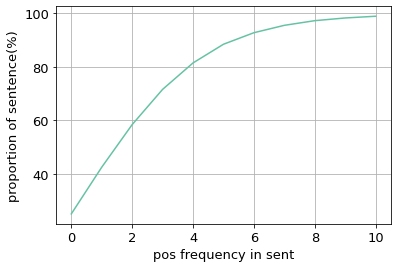

In [244]:
def plot_pos_freq(freqs, max_freq=20):
    rare_range = np.arange(0, max_freq + 1)
    freqs = np.array(freqs)
    
    cum_counts = []
    for i in rare_range:
        cum_word_count = sum(freqs <= i) / len(freqs) * 100
        cum_counts.append(cum_word_count)

    fig, ax = plt.subplots()
    sns.lineplot(x=rare_range, y=cum_counts, ax=ax)
    ax.set_xlabel('pos frequency in sent', fontsize=13)
    ax.set_ylabel('proportion of sentence(%)', fontsize=13)
    ax.grid()
    ax.xaxis.set_tick_params(labelsize=13)
    ax.yaxis.set_tick_params(labelsize=13)
    
    print(cum_counts)

    for v in [30,40,50,60,70,80,90]:
        print(v, rare_range[ np.array(cum_counts) <= v ][-1], np.array(cum_counts)[np.array(cum_counts) <= v][-1])
    

plot_pos_freq(pos_counts_in_sent['IN-TO'], max_freq=10)


[13.098047989261143, 30.79143128810336, 50.86302365904133, 67.4120476536719, 79.50780244980145, 87.33821802114213, 92.21321102969965, 95.19771799317635, 96.92935846523855, 98.07036187706247, 98.73594720062643, 99.19346719615191, 99.47424352592427]
30 0 13.098047989261143
40 1 30.79143128810336
50 1 30.79143128810336
60 2 50.86302365904133
70 3 67.4120476536719
80 4 79.50780244980145
90 5 87.33821802114213


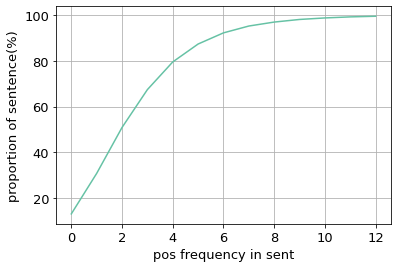

In [245]:
plot_pos_freq(pos_counts_in_sent[verb_list], max_freq=12)



# Tools

In [3]:
def read_score(model='baseline', subset='bc', metric='micro_f1', subtype='test', version=0):
    '''
    model: baseline, pooling, mult
    subset: which sub dataset to be evaluated
    '''
       
    metric = subtype + '_' + metric
    metric_score = {} 
    metric_score[metric] = 0
    
    if 'pooling_' in model:
        model = 'pool_' + model.split('_')[-1]
    if model == 'mult':
        model = 'mult_private'

    if version < 0:
        version = ''
    else:
        version = '_' + str(version)

    fpath = './experiments' + version + '/' + model + '/' + subset + '/eval_' + subtype + '_best_metric.txt'

    try:
        with open(fpath, 'r', encoding='utf8') as f:
            for line in f:
                key, val = line.split(':')
                metric_score[key.strip()] = float(val.strip())
    except:
        print('Error, model=>{}, subset=>{}'.format(model, subset))

    if metric:
        return metric_score[metric]
    else:
        return metric_score

    
    
def load_sentences(domain='pool', data_type=['train', 'test', 'valid'], version=0):
    sents = None

    for dt in ['train', 'test', 'valid']:
        if dt not in data_type:
            continue

        if version < 0:
            version = ''
        else:
            version = '_' + str(version)
       
        dt_sents = pd.read_csv('./data' + version + '/' + domain + '/' + dt + '/sentences.txt', sep='\n', header=None)
        if sents is None:
            sents = dt_sents
        else:
            sents = pd.concat([sents, dt_sents], axis=0)

    sents.columns = ['sentence']
    return sents


def load_feat_sentences(domain='tc', feat='sent', val_range=[1], version=0):
    sents = None
    
    if version < 0:
        version = ''
    else:
        version = '_' + str(version)

    for v in val_range:
        dt_sents = pd.read_csv('./data' + version + '/' + domain + '/' + 'test_' + feat + '_' + str(v)  + '/sentences.txt', sep='\n', header=None)
        if sents is None:
            sents = dt_sents
        else:
            sents = pd.concat([sents, dt_sents], axis=0)
        
    sents.columns = ['sentence']
    return sents


def cal_sent_len(domain='pool', sub_dataset=['train', 'valid', 'test']):
    sents = load_sentences(domain, sub_dataset)
   
    sent_len = []
    for sent in sents['sentence']:
        sent_words = sent.split()
        
        if sent_words[-1] in string.punctuation:
            sent_len.append( len(sent_words) - 1 )
        else:
            sent_len.append( len(sent_words) )
    
    return pd.Series( sent_len )



def cal_word_freq(corpus):
    words = []
    for sent in corpus: # each sent
        for w in sent.split(): # each word            
            words.append(w.lower())

    w_freq = nltk.FreqDist(words)

    return {w: q for w, q in w_freq.items()}, np.array(list(w_freq.keys())), np.array(list(w_freq.values()))



def plot_word_cloud(text, size=(8, 8)):
    wordcloud = WordCloud(
        background_color = 'white',
        random_state = 42
    ).generate(text)

    plt.figure( figsize=size )
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

    

def plot_counts_by_seq_len(sent_len_all_domain, sen_len_threshold, domain='all domains'):
    x_label = []
    sen_len_counts_by_threshold = np.zeros(len(sen_len_threshold) - 1)
        
    for i, v in enumerate(sen_len_threshold[:-1]):
        next_v = int(sen_len_threshold[ i + 1 ])
        v = int(v)
        range_sent_len = sent_len_all_domain[ 
            (sent_len_all_domain < next_v) & (sent_len_all_domain >= v)
        ]
        x_label.append('[{}, {})'.format(v, next_v))
        sen_len_counts_by_threshold[i] = len(range_sent_len) / len(sent_len_all_domain)

    print('counts', sen_len_counts_by_threshold)

    fig, ax = plt.subplots(figsize=(8, 4))
    sns.barplot(x=x_label, y=sen_len_counts_by_threshold)
    ax.set_ylabel('Counts', fontsize=13)
    ax.set_xlabel('Threshold of sent_len {}'.format(domain), fontsize=13)
    plt.show()

    

# Exper II - sent_len
def get_seq_len_f1_score(seq_len_range, domains, model='mult', mean=False, version=0):
    seq_len_f1 = []

    for d in domains: # each domain
        metric_per_model = []
        for t in seq_len_range[:-1]:
            metric_per_model.append( read_score(model=model, subset=d, subtype='test_sent_' + str(t), version=version) )
        
        if mean:
            metric_per_model_new = np.array(metric_per_model)
            metric_per_model.append(np.mean( metric_per_model_new[metric_per_model_new>0] ))
            metric_per_model.append(np.std( metric_per_model_new[metric_per_model_new>0] ))

        seq_len_f1.append(metric_per_model)
        
    columns = [ '[{},{})'.format(v, seq_len_range[i+1]) for i, v in enumerate( seq_len_range[:-1] ) ]
    if mean:
        columns += ['mean', 'std']

    seq_len_f1 = pd.DataFrame(seq_len_f1, columns=columns, index=domains)

    return seq_len_f1


def plot_seq_len_f1_score(seq_len_range, domains, version=0):
    seq_len_f1_score = get_seq_len_f1_score(seq_len_range, domains, version=version)

    seq_len_f1_score_verted = seq_len_f1_score.reset_index()
    seq_len_f1_score_verted = pd.melt(seq_len_f1_score_verted, id_vars=['index'])
    seq_len_f1_score_verted.columns = ['domain', 'seq_len', 'f1-score']

    
    fig, ax = plt.subplots(figsize=(6, 3))
    sns.lineplot(data=seq_len_f1_score.T)
#     ax.legend(bbox_to_anchor=(1.03, 1), loc=2)
    ax.set_xlabel('sentence length', fontsize=13)
    ax.xaxis.set_tick_params(labelsize=12)
    ax.set_ylabel('f1-score', fontsize=13)
    


    fig, ax = plt.subplots(figsize=(8, 4))
    sns.barplot(x='domain', y='f1-score', hue='seq_len', data=seq_len_f1_score_verted, ax=ax)
    ax.legend(bbox_to_anchor=(1.03, 1), loc=2)
    ax.set_xlabel('domain', fontsize=13)
    ax.xaxis.set_tick_params(labelsize=13)
    ax.set_ylabel('f1-score', fontsize=13)
    

# Exper II - rare word
def get_rare_f1_score(rare_word_range, domains, model='mult', mean=False, version=0):
    seq_len_f1 = []

    for d in domains: # each domain
        metric_per_model = []
        for t in rare_word_range[:-1]:
            metric_per_model.append( read_score(model=model, subset=d, subtype='test_rare_' + str(t), version=version) )
        
        if mean:
            metric_per_model_new = np.array(metric_per_model)
            metric_per_model.append(np.mean( metric_per_model_new[metric_per_model_new>0] ))
            metric_per_model.append(np.std( metric_per_model_new[metric_per_model_new>0] ))

        seq_len_f1.append(metric_per_model)
        
    columns = [ '[{},{})'.format(v, rare_word_range[i+1]) for i, v in enumerate( rare_word_range[:-1] ) ]
    if mean:
        columns += ['mean', 'std']

    seq_len_f1 = pd.DataFrame(seq_len_f1, columns=columns, index=domains)

    return seq_len_f1


def plot_rare_f1_score(rare_word_range, domains, model='mult', version=0):
    seq_len_f1_score = get_rare_f1_score(rare_word_range, domains, model=model, version=version)

    seq_len_f1_score_verted = seq_len_f1_score.reset_index()
    seq_len_f1_score_verted = pd.melt(seq_len_f1_score_verted, id_vars=['index'])
    seq_len_f1_score_verted.columns = ['domain', 'rare_freq', 'f1-score']
    
    
    fig, ax = plt.subplots(figsize=(5.5, 3))
    sns.lineplot(data=seq_len_f1_score.T)
#     ax.legend(bbox_to_anchor=(1.03, 1), loc=2)
    ax.set_xlabel('rare word frequency', fontsize=13)
    ax.xaxis.set_tick_params(labelsize=13)
    ax.set_ylabel('f1-score', fontsize=13)
    

    fig, ax = plt.subplots(figsize=(8, 4))
    sns.barplot(x='domain', y='f1-score', hue='rare_freq', data=seq_len_f1_score_verted, ax=ax)
    ax.legend(bbox_to_anchor=(1.03, 1), loc=2)
    ax.set_xlabel('domain', fontsize=13)
    ax.xaxis.set_tick_params(labelsize=13)
    ax.set_ylabel('f1-score', fontsize=13)



# Exper II - POS,PREP
def get_prep_f1_score(rare_word_range, domains, model='mult', mean=False, version=0):
    seq_len_f1 = []

    for d in domains: # each domain
        metric_per_model = []
        for t in rare_word_range[:-1]:
            metric_per_model.append( read_score(model=model, subset=d, subtype='test_pos_prep_' + str(t), version=version) )
        
        if mean:
            metric_per_model_new = np.array(metric_per_model)
            metric_per_model.append(np.mean( metric_per_model_new[metric_per_model_new>0] ))
            metric_per_model.append(np.std( metric_per_model_new[metric_per_model_new>0] ))

        seq_len_f1.append(metric_per_model)
        
    columns = [ '[{},{})'.format(v, rare_word_range[i+1]) for i, v in enumerate( rare_word_range[:-1] ) ]
    if mean:
        columns += ['mean', 'std']

    seq_len_f1 = pd.DataFrame(seq_len_f1, columns=columns, index=domains)

    return seq_len_f1


def get_verb_f1_score(rare_word_range, domains, model='mult', mean=False, version=0):
    seq_len_f1 = []

    for d in domains: # each domain
        metric_per_model = []
        for t in rare_word_range[:-1]:
            metric_per_model.append( read_score(model=model, subset=d, subtype='test_pos_verb_' + str(t), version=version) )
        
        if mean:
            metric_per_model_new = np.array(metric_per_model)
            metric_per_model.append(np.mean( metric_per_model_new[metric_per_model_new>0] ))
            metric_per_model.append(np.std( metric_per_model_new[metric_per_model_new>0] ))

        seq_len_f1.append(metric_per_model)
        
    columns = [ '[{},{})'.format(v, rare_word_range[i+1]) for i, v in enumerate( rare_word_range[:-1] ) ]
    if mean:
        columns += ['mean', 'std']

    seq_len_f1 = pd.DataFrame(seq_len_f1, columns=columns, index=domains)

    return seq_len_f1


# Exper I
def get_domain_f1_score(version=0):
    model_domain_f1 = []

    for model in model_types: # each model
        metric_per_model = [] 
        for d in domains: # each domain
            if model == 'pooling':
                metric_per_model.append( read_score(model=model + '_' + d, subset=d, version=version) )
            else:
                metric_per_model.append( read_score(model=model, subset=d, version=version) )
        model_domain_f1.append(metric_per_model)

    model_domain_f1 = pd.DataFrame(model_domain_f1, columns=domains, index=model_types)

    return model_domain_f1


def plot_domain_f1_score(version=0):
    model_domain_f1 = get_domain_f1_score(version=version)

    model_domain_f1_verted = model_domain_f1.reset_index()
    model_domain_f1_verted = pd.melt(model_domain_f1_verted, id_vars=['index'])
    model_domain_f1_verted.columns = ['model', 'domain', 'f1-score']

    fig, ax = plt.subplots(figsize=(6, 4))
    sns.barplot(x='domain', y='f1-score', hue='model', data=model_domain_f1_verted, ax=ax)
    ax.legend(bbox_to_anchor=(1.03, 1), loc=2)
    ax.set_xlabel('domain', fontsize=13)
    ax.xaxis.set_tick_params(labelsize=13)
    ax.set_ylabel('f1-score', fontsize=13)

    
def cal_entity_by_sent(domain='tc', feature='sent', seq_len_range=None, version=0):
    ratio = {}
    entity = {}

    if version < 0:
        version = ''
    else:
        version = '_' + str(version)

    total_tokens = []
    for val in seq_len_range[:-1]:
        entity[val] = []

        with open('./data' + version + '/' + domain + '/test_' + feature + '_' + str(val) + '/labels.txt') as f:
            for sent in f: # each sent
                for label in sent.split(): # each token
                    total_tokens.append(label)

                    if '-' in label:
                        entity[val].append(label)
    
    for val in seq_len_range[:-1]:
        ratio[val] = round(len(entity[val]) / len(total_tokens) * 100, 2)
    

    return ratio


def load_error_word_by_feat(domain='tc', feat='sent', ranges=[25,35], version=0):
    words = []
    real_labels = []
    pre_labels = []
    
    if version < 0:
        version = ''
    else:
        version = '_' + str(version)

    for r in ranges:
        with open('./experiments' + version + '/' + '/mult_private/' + domain + '/eval_test_' + feat + '_' + str(r) + '_best_result.txt') as f:
            for line in f:
                w, y_true, y_pre =  line.split()
                # error
                if ('-' in y_true and (('-' in y_pre and y_true != y_pre) or ('-' not in y_pre))):
                    words.append(w)
                    real_labels.append(y_true)
                    pre_labels.append(y_pre)

    return words


def plot_rare_freq(freqs, max_freq=20):
    rare_range = np.arange(0, max_freq + 1)
    cum_counts = []

    for i in rare_range:
        cum_word_count = sum(freqs <= i) / len(freqs) * 100
        cum_counts.append(cum_word_count)

    fig, ax = plt.subplots()
    sns.lineplot(x=rare_range, y=cum_counts, ax=ax)
    ax.set_xlabel('word frequency', fontsize=13)
    ax.set_ylabel('proportion of vocabulary(%)', fontsize=13)
    ax.grid()
    ax.xaxis.set_tick_params(labelsize=13)
    ax.yaxis.set_tick_params(labelsize=13)

    for v in [40,50,60,65,70,75,80,85,90]:
        print(v, rare_range[ np.array(cum_counts) <= v ][-1])
